In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Database = automap_base()

# reflect the tables
Database.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Database.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Database.classes.measurement
Station = Database.classes.station

In [239]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
inspector = inspect(engine)

In [9]:
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

'2017-08-23'

In [240]:
# GOAL TO THE END: Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# STEP 1: Starting from the most recent data point in the database. 
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# STEP 2: Calculate the date one year from the last date in data set.
twelvemo = dt.datetime.strptime(recent_date[0],'%Y-%m-%d') - dt.timedelta(days=365)

# STEP 3: Perform a query to retrieve the data and precipitation scores
precip12mo = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > twelvemo).all()

# STEP 4: Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip12mo, columns = ['date', 'prcp'])


# STEP 5: Sort the dataframe by date
precip_df.set_index('date').sort_values('date', ascending=False)

#Step 5b: Find max precipitation within twelve months
prec_max = max(precip_df['prcp'])
print (prec_max)

6.7


In [46]:
#Step 5c: For loop each output with Year-Month
year_month = []
for date in precip_df['date']:
    year_month.append(date[0:7])
precip_df ['year_month'] = year_month
print (precip_df)

            date  prcp year_month
0     2016-08-24  0.08    2016-08
1     2016-08-25  0.08    2016-08
2     2016-08-26  0.00    2016-08
3     2016-08-27  0.00    2016-08
4     2016-08-28  0.01    2016-08
...          ...   ...        ...
2218  2017-08-19  0.09    2017-08
2219  2017-08-20   NaN    2017-08
2220  2017-08-21  0.56    2017-08
2221  2017-08-22  0.50    2017-08
2222  2017-08-23  0.45    2017-08

[2223 rows x 3 columns]


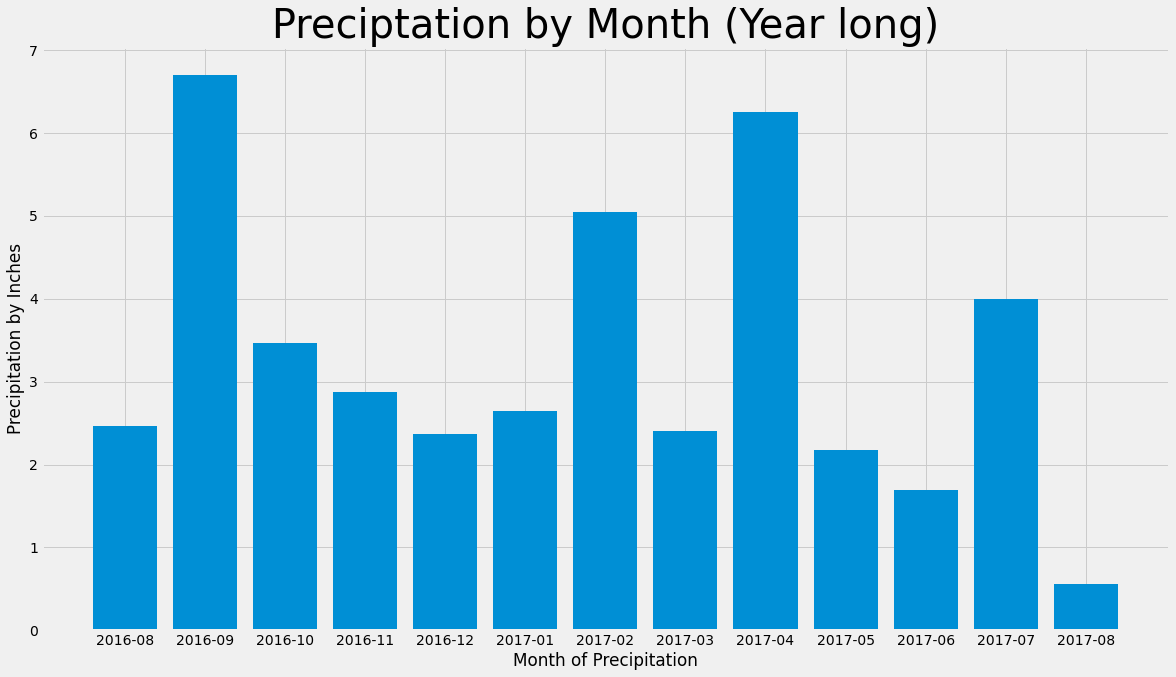

In [60]:
#Step 5d: Plot the rainfall data using plt
plt.figure(figsize=(18,10))
plt.bar(precip_df['year_month'],precip_df['prcp'])
plt.title('Preciptation by Month (Year long)', fontsize=40)
plt.xlabel('Month of Precipitation')
plt.ylabel('Precipitation by Inches')
plt.show()

In [29]:
# STEP 6: Use Pandas Plotting with Matplotlib to plot the data
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [69]:
# Design a query to calculate the total number stations in the dataset
tot_number_stations = session.query(Measurement).group_by(Measurement.station).count()

print(f' Station Count: {tot_number_stations}')

 Station Count: 9


In [90]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [107]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#pulled 0 position from first tuple
active_id = active_stations[0][0]
active_id

'USC00519281'

In [118]:
inspector.get_columns('Measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [195]:
#Identifying station name by filtering ID
name_station = session.query(Station.name).filter_by(station = active_id)
name_station = name_station[0][0]

In [196]:
#Lowest, highest, avg temperature ####filtering 
Lowest_temp = session.query(Measurement.tobs).filter(Measurement.station == active_id).order_by(Measurement.tobs.asc()).first()
Highest_temp = session.query(Measurement.tobs).filter(Measurement.station == active_id).order_by(Measurement.tobs.desc()).first()
Avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == active_id).all()
Avg_temp = round(Avg_temp[0][0],2)

In [197]:
#print statements
print(f'Station ID: {active_id}. The most active station is {name_station}')
print (f'For {name_station}, The lowest temperature is {Lowest_temp[0]} degrees Fareheit, the highest temperature is {Highest_temp[0]} degrees Farenheit, and the average temperature is {Avg_temp} degrees Farenheit.')

Station ID: USC00519281. The most active station is WAIHEE 837.5, HI US
For WAIHEE 837.5, HI US, The lowest temperature is 54.0 degrees Fareheit, the highest temperature is 85.0 degrees Farenheit, and the average temperature is 71.66 degrees Farenheit.


In [206]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == active_id).filter(Measurement.date > twelvemo).order_by(Measurement.date).all()

In [236]:
#adding station year data to pd.DataFrame before plotting
station_year_temps = pd.DataFrame(year_temp).sort_index(ascending = True)
station_year_temps

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


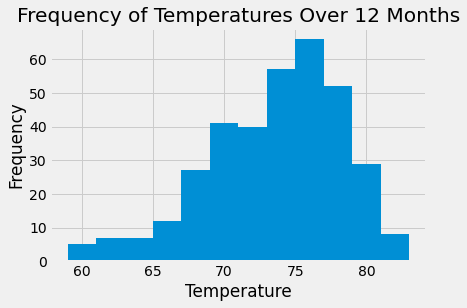

In [237]:
station_year_temps.hist(bins=12)
plt.title('Frequency of Temperatures Over 12 Months')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close session

In [238]:
# Close Session
session.close()